In [1]:
import scvelo as scv
from p_tqdm import p_map
import glob
import scanpy as sc
import pandas as pd
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [2]:
def load_loom(path):
    adata=scv.read(path)
    adata=adata[~adata.obs_names.isin(["velocyted:Aligned.out.bam"]),]
    adata.obs.index=list(map(lambda x: x.replace("velocyted", path.split("/")[3]),adata.obs.index))
    adata.obs["timeloc"]=path.split("/")[1]
    adata.var_names_make_unique()
    return(adata)

In [3]:
glob.glob("../_Data/*/*/*.loom")+glob.glob("../_Data_rev/*/*/*.loom")

['../_Data/AGZO18.5/SS2_19_358/velocyted.loom',
 '../_Data/Adrenal12.5/SS2_16_249-2/velocyted.loom',
 '../_Data/Adrenal13.5/SS2_16_250-2/velocyted.loom',
 '../_Data/Adrenal13.5/SS2_16_258-2/velocyted.loom',
 '../_Data/Adrenal14.5/SS2_19_342/velocyted.loom',
 '../_Data/Adrenal16.5/SS2_19_344/velocyted.loom',
 '../_Data/AdrenalP2/SS2_19_360/velocyted.loom',
 '../_Data/AdrenalP2/SS2_19_362/velocyted.loom',
 '../_Data/Cranial10.5/SS2_16_026/velocyted.loom',
 '../_Data/Cranial12.5/SS2_15_0073/velocyted.loom',
 '../_Data/Cranial12.5/SS2_15_0169/velocyted.loom',
 '../_Data/Cranial9.5/SS2_15_0088-2/velocyted.loom',
 '../_Data/Cranial9.5/SS2_15_0088/velocyted.loom',
 '../_Data/Cranial9.5/SS2_16_027/velocyted.loom',
 '../_Data/Cranial9.5/SS2_16_032/velocyted.loom',
 '../_Data/Gut12.5/SS2_15_0170/velocyted.loom',
 '../_Data/Gut18.5/SS2_15_0173/velocyted.loom',
 '../_Data/Limb14.5/SS2_19_350/velocyted.loom',
 '../_Data/Limb16.5/SS2_19_338/velocyted.loom',
 '../_Data/LimbSkin12.5/SS2_15_0168/velocy

In [4]:
alladata=list(p_map(load_loom, glob.glob("../_Data/*/*/*.loom")+glob.glob("../_Data_rev/*/*/*.loom")))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call 

In [5]:
import anndata
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.0.0
anndata             0.7.4
backcall            0.1.0
cffi                1.14.0
cloudpickle         1.3.0
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.14.0
dateutil            2.8.1
decorator           4.4.2
dill                0.3.1.1
future_fstrings     NA
get_version         2.1
google              NA
h5py                2.10.0
igraph              0.8.2
importlib_metadata  0.18
ipykernel           5.1.4
ipyparallel         6.2.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.16.0
joblib              0.14.1
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.31.0
louvain             0.7.0
matplotlib          3.2.1
mpl_toolkits        NA
multiprocess        0.70.9
natsort             7.0.1
numba               0.48.0
numexpr             2.7.1
numpy               1.18.1
p_

In [6]:
adata=anndata.AnnData.concatenate(*alladata,index_unique=None)

In [7]:
adata

AnnData object with n_obs × n_vars = 14967 × 54446
    obs: 'timeloc', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [8]:
#umap=pd.read_csv("UMAP.csv",index_col=0)
diff=pd.read_csv("UMAP_Glia_auc_mega.csv",index_col=0)

In [9]:
diff.index

Index(['SS2_16_249-2:A1_unique.bam', 'SS2_16_249-2:A2_unique.bam',
       'SS2_16_249-2:A6_unique.bam', 'SS2_16_249-2:A3_unique.bam',
       'SS2_16_249-2:A5_unique.bam', 'SS2_16_249-2:A4_unique.bam',
       'SS2_16_249-2:A8_unique.bam', 'SS2_16_249-2:A7_unique.bam',
       'SS2_16_249-2:A9_unique.bam', 'SS2_16_249-2:A11_unique.bam',
       ...
       'SS2_19_366:P15_unique.bam', 'SS2_19_366:P13_unique.bam',
       'SS2_19_366:P12_unique.bam', 'SS2_19_366:P11_unique.bam',
       'SS2_19_366:P19_unique.bam', 'SS2_19_366:P17_unique.bam',
       'SS2_19_366:P21_unique.bam', 'SS2_19_366:P24_unique.bam',
       'SS2_19_366:P22_unique.bam', 'SS2_19_366:P20_unique.bam'],
      dtype='object', name='Cell', length=6977)

In [10]:
adata

AnnData object with n_obs × n_vars = 14967 × 54446
    obs: 'timeloc', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [11]:
adata=adata[diff.index,:]
import numpy as np
adata.obs['leiden']=pd.read_csv("leiden_mega.csv")["x"].values.astype(str)
adata.obs['leiden']=adata.obs['leiden'].astype('category')
adata.obsm["X_diff"]=diff.values

Trying to set attribute `.obs` of view, copying.


In [ ]:
#scv.pp.filter_genes(adata, min_shared_counts=20)
adata.write_h5ad("adata_velo_all.h5ad")

... storing 'timeloc' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


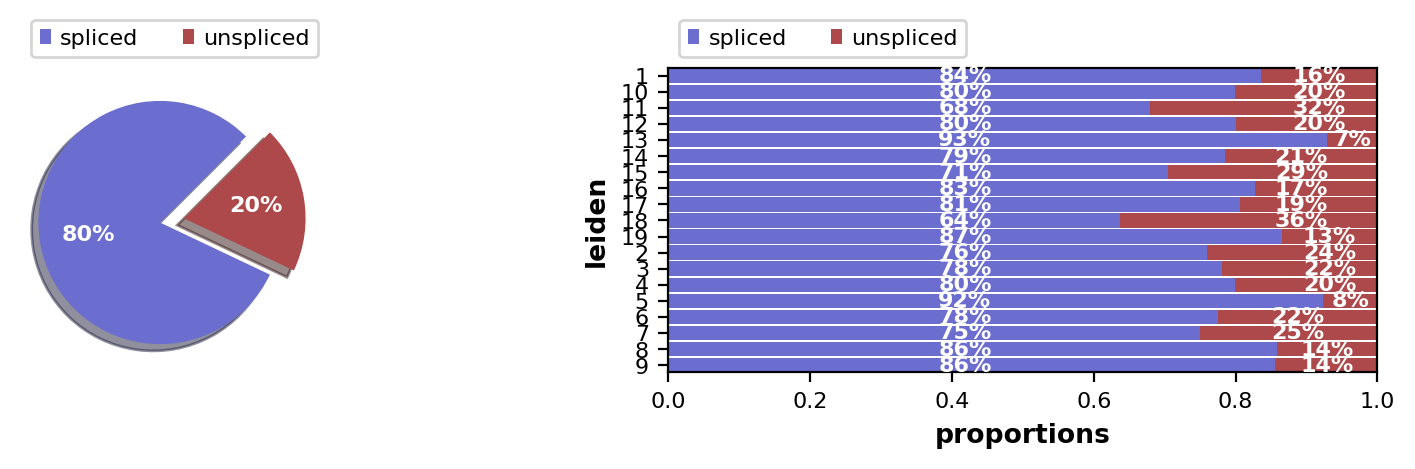

In [83]:
scv.pl.proportions(adata,groupby="leiden")

In [96]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 24 genes that are detected 20 counts (shared).
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)


In [97]:
scv.pp.moments(adata,use_rep="diffusion",n_neighbors=30)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [98]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [99]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:27) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_diff', embedded velocity vectors (adata.obsm)


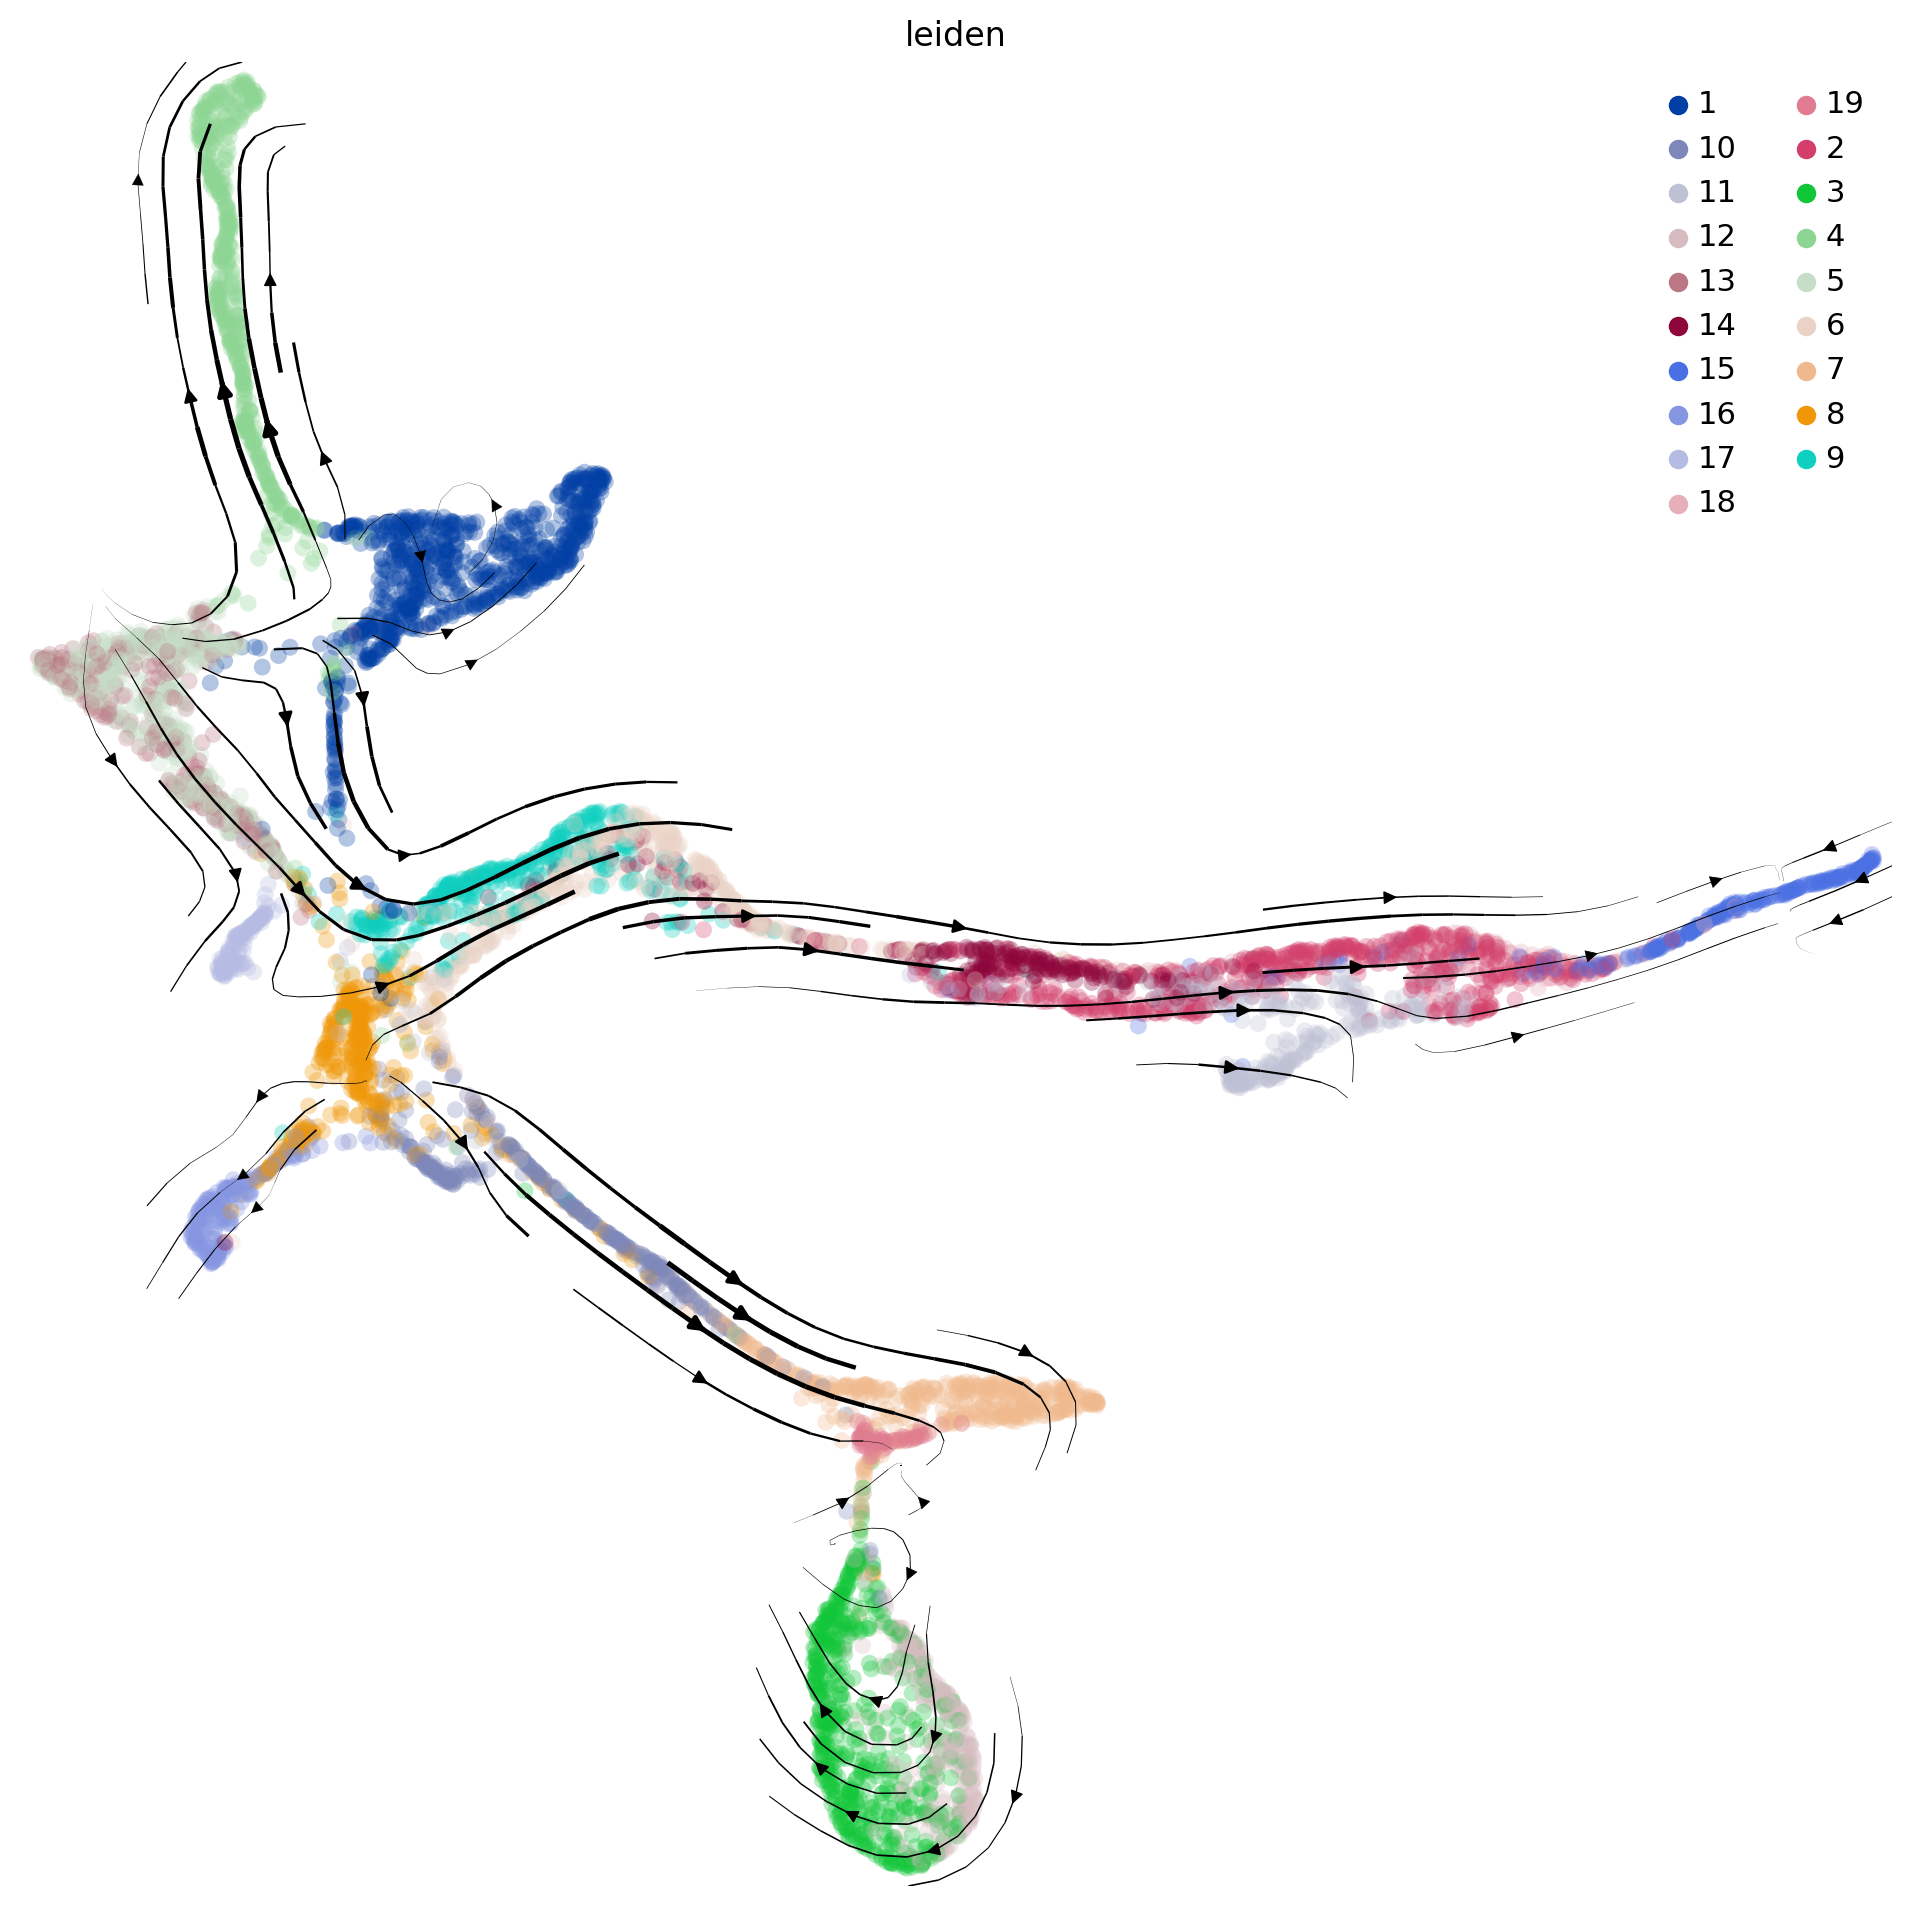

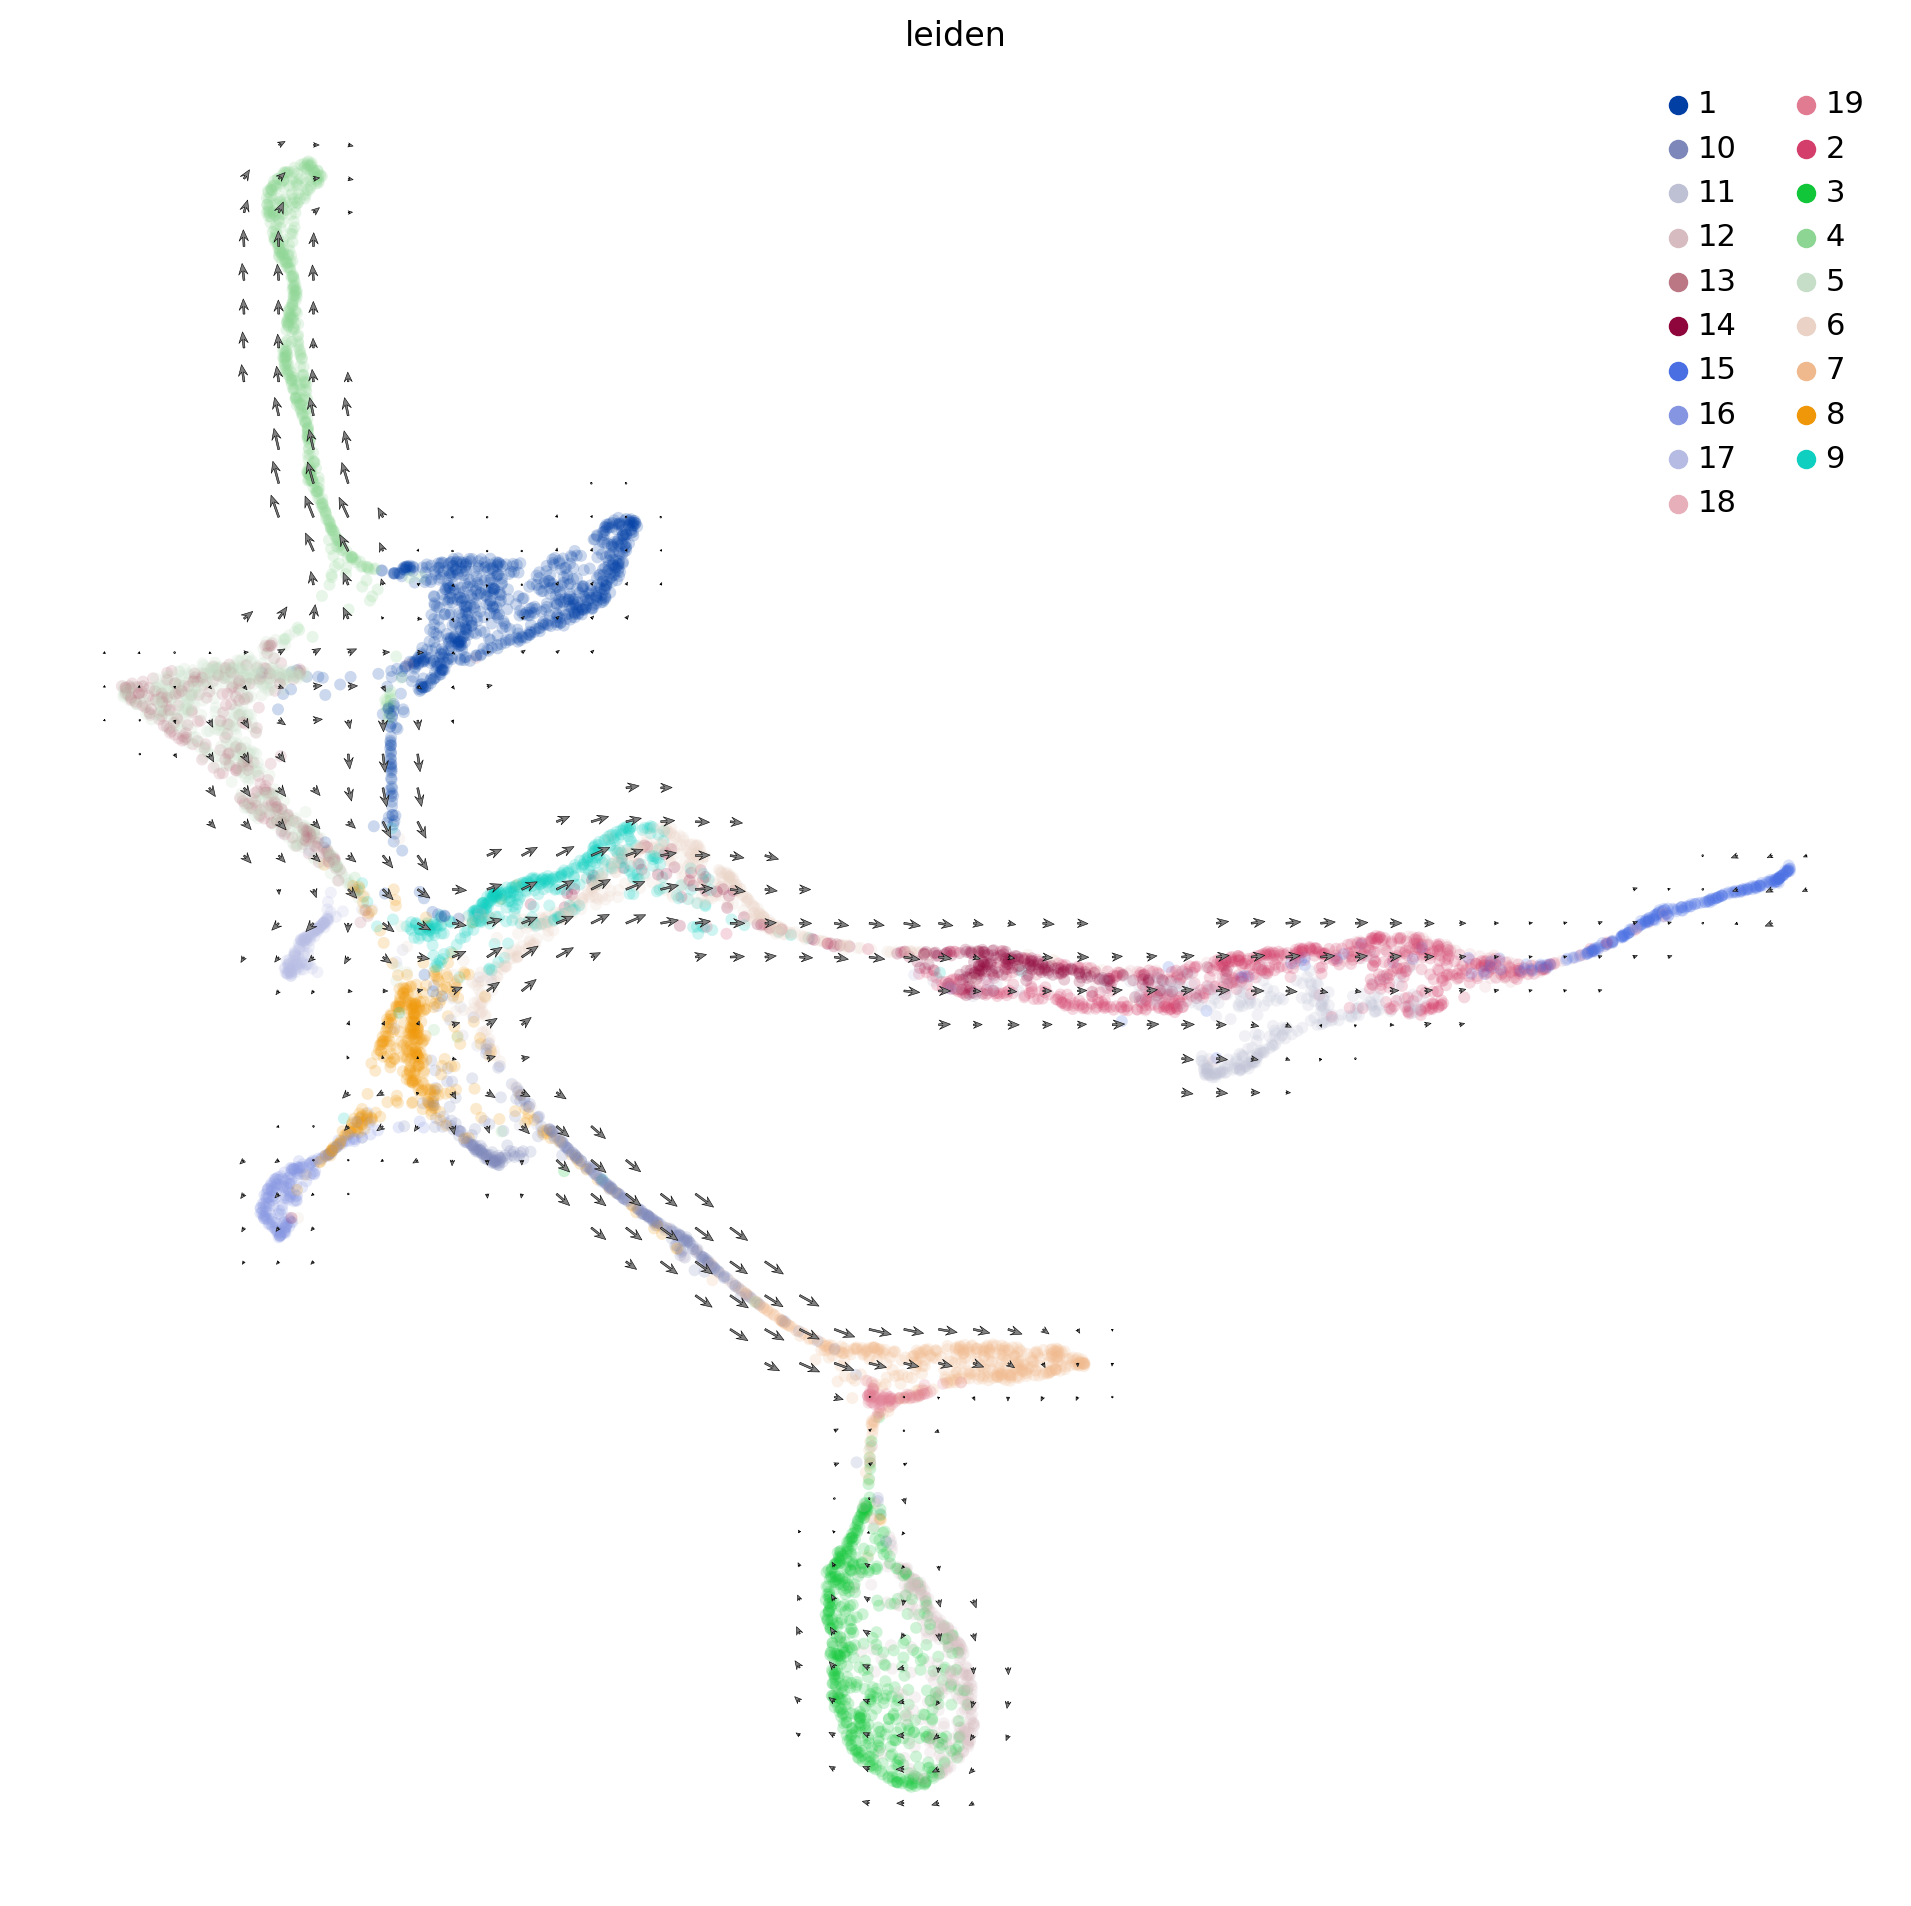

In [101]:
scv.tl.velocity_embedding(adata,basis='diff')
scv.pl.velocity_embedding_stream(adata, basis='diff',color="leiden",figsize=(12,12),legend_loc="bottom")
scv.pl.velocity_embedding_grid(adata, basis='diff',color="leiden",figsize=(12,12),legend_loc="bottom")